# Real Time Testing

In [7]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the previously saved model
model = load_model('GestureModellili.keras')

# Function to preprocess the frame
def preprocess_frame(frame, target_size=(224, 224)):
    frame = cv2.resize(frame, target_size)
    frame = img_to_array(frame)
    frame = np.expand_dims(frame, axis=0)
    frame = preprocess_input(frame)
    return frame

# Start capturing video
cap = cv2.VideoCapture(0)

# Initialize EMA variables
ema_score = 0  # Initial EMA score can be 0 or set to the first frame's score later
smoothing_factor = 2 / (30 + 1)  # For span of 30 frames

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret:
        break

    # Preprocess the frame
    processed_frame = preprocess_frame(frame)

    # Make prediction
    prediction = model.predict(processed_frame)

    # Convert prediction to a confidence score (0 = Confident, 1 = Stressed)
    confidence_score = (1 - prediction[0][0]) * 10  # Convert to a score out of 10

    # Update EMA score
    if ema_score == 0:  # Initialize EMA score with the first frame's score
        ema_score = confidence_score
    else:
        ema_score = (confidence_score * smoothing_factor) + (ema_score * (1 - smoothing_factor))

    # Determine color based on ema_score (green if 6 or more, otherwise red)
    color = (0, 255, 0) if ema_score >= 5 else (0, 0, 255)

    # Display the resulting frame with the EMA confidence score
    cv2.putText(frame, f"Confidence Score: {ema_score:.2f}/10", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
    cv2.imshow('Frame', frame)

    # Break the loop with the 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

print(f"EMA-Based Average Confidence Score: {ema_score:.2f}/10")

# When everything is done, release the capture
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━

# Real Time Testing 2

In [8]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the previously saved model
model = load_model('GestureModellili.keras')

# Function to preprocess the frame
def preprocess_frame(frame, target_size=(224, 224)):
    frame = cv2.resize(frame, target_size)
    frame = img_to_array(frame)
    frame = np.expand_dims(frame, axis=0)
    frame = preprocess_input(frame)
    return frame

# Start capturing video
cap = cv2.VideoCapture(0)

# Initialize variables for exponential smoothing
alpha = 0.2  # Smoothing factor (adjust as needed)
average_score = None  # Initialize average score

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret:
        break

    # Preprocess the frame
    processed_frame = preprocess_frame(frame)

    # Make prediction
    prediction = model.predict(processed_frame)

    # Convert prediction to a confidence score (0 = Confident, 1 = Stressed)
    confidence_score = (1 - prediction[0][0]) * 10  # Convert to a score out of 10

    # Update average score using exponential smoothing
    if average_score is None:
        average_score = confidence_score  # Initialize on the first frame
    else:
        average_score = alpha * confidence_score + (1 - alpha) * average_score

    # Determine color based on average_score (green if 6 or more, otherwise red)
    color = (0, 255, 0) if average_score >= 5 else (0, 0, 255)

    # Display the resulting frame with the average confidence score
    cv2.putText(frame, f"Average Confidence Score: {average_score:.2f}/10", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
    cv2.imshow('Frame', frame)

    # Break the loop with the 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━

In [9]:
print(f"EMA-Based Average Confidence Score: {ema_score:.2f}/10")

EMA-Based Average Confidence Score: 2.00/10


# Ana mou za3len

In [2]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

def capture_video_and_accumulate_scores(model_path, alpha=0.2):
    # Load the previously saved model
    model = load_model(model_path)

    # Start capturing video
    cap = cv2.VideoCapture(0)

    # Initialize variables for exponential smoothing
    average_score = None  # Initialize average score
    total_average_sum = 0.0  # Variable to accumulate the sum of all average scores
    total_average_count = 0  # Counter for the number of frames processed

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()

        if not ret:
            break

        # Preprocess the frame for the model
        processed_frame = cv2.resize(frame, (224, 224))  # Resize frame to match model input shape
        processed_frame = np.expand_dims(processed_frame, axis=0)  # Add batch dimension
        processed_frame = preprocess_input(processed_frame)  # Preprocess input for MobileNetV2

        # Make prediction
        prediction = model.predict(processed_frame)

        # Convert prediction to a confidence score (0 = Confident, 1 = Stressed)
        confidence_score = (1 - prediction[0][0]) * 10  # Convert to a score out of 10

        # Update average score using exponential smoothing
        if average_score is None:
            average_score = confidence_score  # Initialize on the first frame
        else:
            average_score = alpha * confidence_score + (1 - alpha) * average_score

        # Accumulate the current average score to calculate the overall average later
        total_average_sum += average_score
        total_average_count += 1

        # Determine color based on average_score (green if 6 or more, otherwise red)
        color = (0, 255, 0) if average_score >= 5 else (0, 0, 255)

        # Display the resulting frame with the average confidence score
        cv2.putText(frame, f"Average Confidence Score: {average_score:.2f}/10", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
        cv2.imshow('Frame', frame)

        # Break the loop with the 'q' key
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Calculate the overall average of all average scores
    overall_average_score = total_average_sum / total_average_count if total_average_count > 0 else 0.0

    # When everything is done, release the capture
    cap.release()
    cv2.destroyAllWindows()

    return overall_average_score

# Call the function to capture video and accumulate scores
model_path = 'GestureModellili.keras'
alpha_value = 0.2  # Smoothing factor (adjust as needed)
overall_average_score = capture_video_and_accumulate_scores(model_path, alpha=alpha_value)

# Print and display the overall average confidence score
print(f"Overall Average Confidence Score: {overall_average_score:.2f}/10")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━

In [3]:
# Print and display the overall average confidence score
print(f"Overall Average Confidence Score: {overall_average_score:.2f}/10")

Overall Average Confidence Score: 4.03/10


# Model training

Found 5168 validated image filenames belonging to 2 classes.
Found 1292 validated image filenames belonging to 2 classes.
Epoch 1/20


C:\Users\MSI\Desktop\GEstures\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


161/161 - 248s - 2s/step - accuracy: 0.7502 - loss: 0.8765 - precision: 0.6563 - recall: 0.8026 - val_accuracy: 0.8133 - val_loss: 0.7906 - val_precision: 0.7519 - val_recall: 0.7890 - learning_rate: 1.0000e-04
Epoch 2/20


C:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


161/161 - 4s - 26ms/step - accuracy: 0.8750 - loss: 0.3052 - precision: 0.7500 - recall: 1.0000 - val_accuracy: 0.6667 - val_loss: 0.4440 - val_precision: 0.3333 - val_recall: 0.3333 - learning_rate: 1.0000e-04
Epoch 3/20
161/161 - 237s - 1s/step - accuracy: 0.8454 - loss: 0.7041 - precision: 0.7705 - recall: 0.8802 - val_accuracy: 0.8352 - val_loss: 0.7293 - val_precision: 0.7960 - val_recall: 0.7850 - learning_rate: 1.0000e-04
Epoch 4/20
161/161 - 3s - 22ms/step - accuracy: 0.8750 - loss: 0.3130 - precision: 0.7500 - recall: 0.9000 - val_accuracy: 0.8333 - val_loss: 0.5101 - val_precision: 0.6667 - val_recall: 0.6667 - learning_rate: 1.0000e-04
Epoch 5/20
161/161 - 239s - 1s/step - accuracy: 0.8697 - loss: 0.6386 - precision: 0.8030 - recall: 0.8972 - val_accuracy: 0.8547 - val_loss: 0.6954 - val_precision: 0.8023 - val_recall: 0.8402 - learning_rate: 2.0000e-05
Epoch 6/20
161/161 - 4s - 25ms/step - accuracy: 0.9062 - loss: 0.3168 - precision: 0.9375 - recall: 0.8824 - val_accuracy: 

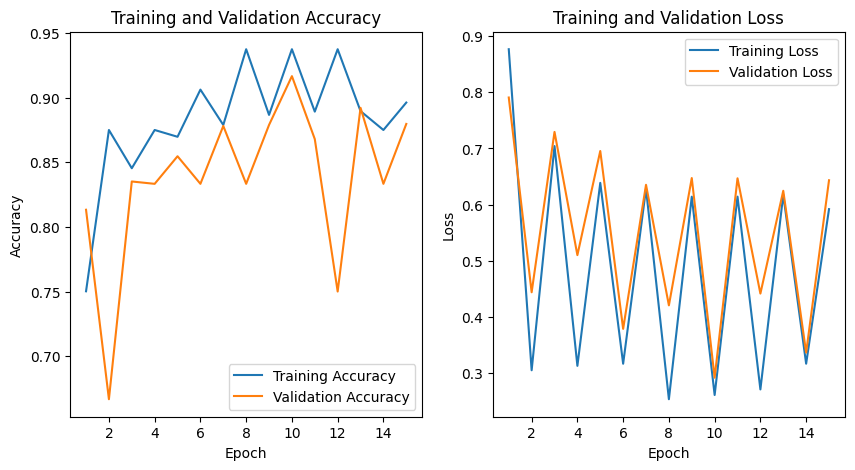

41/41 ━━━━━━━━━━━━━━━━━━━━ 33s 812ms/step - accuracy: 0.8740 - loss: 0.6182 - precision: 0.8245 - recall: 0.8750
41/41 ━━━━━━━━━━━━━━━━━━━━ 34s 809ms/step


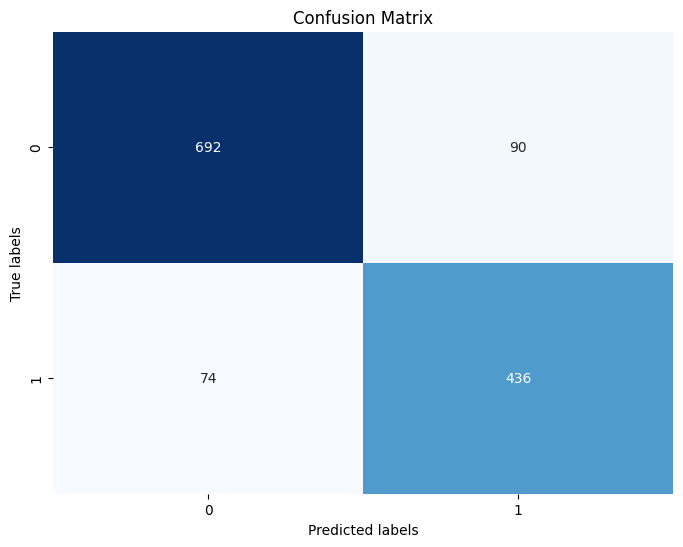

Validation Loss: 0.6416621208190918
Validation Accuracy: 0.8753870129585266
Validation Precision: 0.8362234830856323
Validation Recall: 0.8509804010391235
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       782
           1       0.83      0.85      0.84       510

    accuracy                           0.87      1292
   macro avg       0.87      0.87      0.87      1292
weighted avg       0.87      0.87      0.87      1292



In [1]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1_l2
import datetime
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(1234)

# Function to label data
def label_data(data_dir):
    confident_dir = os.path.join(data_dir, 'confident_pose')
    stressed_dir = os.path.join(data_dir, 'stressed_pose')
    data = []
    for img_name in os.listdir(confident_dir):
        img_path = os.path.join(confident_dir, img_name)
        data.append((img_path, 0))  # Label 0 for confident_pose
    for img_name in os.listdir(stressed_dir):
        img_path = os.path.join(stressed_dir, img_name)
        data.append((img_path, 1))  # Label 1 for stressed_pose
    return pd.DataFrame(data, columns=['file_name', 'label'])

# Load and split data
data_df = label_data('data')
train_df, val_df = train_test_split(data_df, test_size=0.2, random_state=42)

# Convert label column to string
train_df['label'] = train_df['label'].astype(str)
val_df['label'] = val_df['label'].astype(str)

# Data augmentation
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.7, 1.3]
)

# Define data generators
train_data_gen = image_gen_train.flow_from_dataframe(
    dataframe=train_df,
    x_col='file_name',
    y_col='label',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32,
    shuffle=True
)

validation_data_gen = image_gen_train.flow_from_dataframe(
    dataframe=val_df,
    x_col='file_name',
    y_col='label',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

# MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers[:-100]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(x)
x = BatchNormalization(momentum=0.9, epsilon=1e-5)(x)
x = Dropout(0.25)(x)
x = Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(x)
x = BatchNormalization(momentum=0.9, epsilon=1e-5)(x)
x = Dropout(0.25)(x)
preds = Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=preds)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Set up callbacks and class weights
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath='dro.keras', monitor='val_loss', save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001),
    tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
]

# Calculate class weights for balancing the training
labels = train_df['label'].values
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(labels), y=labels)
class_weights_dict = dict(enumerate(class_weights))

# Train the model
history = model.fit(
    train_data_gen,
    steps_per_epoch=len(train_df) // 32,
    epochs=20,
    validation_data=validation_data_gen,
    validation_steps=len(val_df) // 32,
    callbacks=callbacks,
    class_weight=class_weights_dict,
    verbose=2
)

# Plotting training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model
loss, accuracy, precision, recall = model.evaluate(validation_data_gen)

# Generate predictions
y_pred_proba = model.predict(validation_data_gen)
y_pred = (y_pred_proba > 0.5).astype(int)

# Generate confusion matrix and classification report


conf_matrix = confusion_matrix(validation_data_gen.labels, y_pred)
class_report = classification_report(validation_data_gen.labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics and classification report
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)
print("Validation Precision:", precision)
print("Validation Recall:", recall)
print("Classification Report:")
print(class_report)
# Save the model
model.save("GestureModellili.h5")
# Save the model
model.save("GestureModellili.keras")
